# Gaussian Mixture Models

This example uses Gaussian Mixture Models algorithm to generate and analyse Ground Truth data set. In order to do so, we've prepared a set of experiments which results are described below.

### Experiment description
In below experiment, we've collected 1319 rectangle annotations for 5 Scans with 156 Slices total. Labels were taken by 36 Users considered to be non-experts.

### Preparation
At the beginning, let's import the most important modules and classes from the MedTagger internal API.

In [1]:
from medtagger.database import models
from medtagger.ground_truth.algorithms.gaussian_mixture_models import \
    GaussianMixtureModelsAlgorithm
from medtagger.ground_truth.generator import DataSetGenerator
from medtagger.ground_truth.quality import figures
from medtagger.ground_truth.quality.user_specificity_sensitivity import \
    compute_specificity_and_sensitivity_for_users

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]

### Create Generator instance

To create Ground Truth data set, all you need is to define your data set generator and an algorithm that should be used during generation.

In [3]:
algorithm = GaussianMixtureModelsAlgorithm()
generator = DataSetGenerator(algorithm)

### Select Scans for analysis

Then, select all Scans that you would like to analyse.

In [4]:
scans = models.Scan.query.all()
scans_ids = {scan.id for scan in scans}
print(f'Scan IDs: {scans_ids}')

Scan IDs: {'8b5d264d-bc2f-458f-ba68-2a987d55deae', '03647f36-d874-480b-aaec-c2c3b9d80092', 'b750320e-5664-4eff-b4c7-49e4f43ce6ca', '40761156-99db-4647-9b72-8e449e6cb54c', '7985ea16-d5a4-4bda-92db-43a3cc074216'}


### Select Label Elements for analysis

Now, select all Label Elements that should be analysed.

**IMPORTANT:** Currently Data Set Generator assumes only one Label Element per Slice. Don't worry, this will change in the near future.

In [5]:
query = models.RectangularLabelElement.query.join(models.Label)
query = query.filter(models.Label.scan_id.in_(scans_ids))
rectangular_label_elements = query.all()
print(f'There are {len(rectangular_label_elements)} Rectangular Label Elements.')
print(f'Example: {rectangular_label_elements[0]}')

There are 1319 Rectangular Label Elements.
Example: <RectangularLabelElement: 6b7518c7-3d5c-408b-811c-a144e10b154c>


### Generate Ground Truth data set

Take your Label Elements and use generator to generate output Ground Truth annotations for each Slice that took part in the labeling process.

In [6]:
ground_truth = generator.generate(rectangular_label_elements)
ground_truth

{'98e0976c-9f6f-4d73-b8b9-2020c48c7d9b': None,
 'ab6c4cb6-7d66-4a61-a0ad-2f444d197eba': array([0.25703314, 0.48506169, 0.38970684, 0.71639428]),
 '60f9abaa-ecb3-4701-acbd-f129bde2dda3': None,
 'cc2379c8-e487-4a41-95d1-7bbe0badcd4d': array([0.30943122, 0.3790784 , 0.42697558, 0.53314547]),
 'd10ef7d5-761e-4f08-9fa3-0858bec1effa': array([0.31383529, 0.37764182, 0.44235587, 0.57775082]),
 '5db2ce9c-ce8a-45a6-8f2d-3925433eac54': None,
 '94441303-215e-4628-b6e8-a83a9ecd6449': None,
 '715b023e-d4e7-42e6-b962-d6e9919a115d': array([0.27530339, 0.07888134, 0.41761155, 0.27273853]),
 '9474b30b-1a04-428e-8731-22408eef0b58': None,
 '4cbaa8bd-155c-42a9-b5a6-18e4166f563e': array([0.32087382, 0.43152675, 0.4438839 , 0.62175446]),
 '40b13746-cdf2-4aea-a414-124adfd65c9e': None,
 '6e9fae4e-571e-46fc-b2ea-0fa1361b677f': array([0.29602339, 0.13937975, 0.44223239, 0.37063599]),
 '7f1563b7-6501-4aa8-a81b-b065d30f5d73': array([0.29139647, 0.08359373, 0.38663821, 0.2118556 ]),
 '47215e81-9344-4f14-b72d-6094db

### Check Users' Specificity and Sensitivity

MedTagger supports easy calculation of Users' Specificity, Sensitivity and Score based on their annotations and Ground Truth data set.

In [7]:
users = set(element.label.owner for element in rectangular_label_elements)
print(f'There are {len(users)} Users.')

There are 36 Users.


In [8]:
users_specificity, users_sensitivity, users_scores = \
    compute_specificity_and_sensitivity_for_users(algorithm, users,
                                                  rectangular_label_elements, ground_truth)

In [9]:
users_ids = set(e.label.owner_id for e in rectangular_label_elements)
for user_id in users_ids:
    print(f'User #{user_id:03d}: Sensitivity={users_sensitivity[user_id]:1.5f} '
          f'Specificity={users_specificity[user_id]:1.5f} Score={users_scores[user_id]:1.5f}')

User #001: Sensitivity=0.00000 Specificity=0.98649 Score=0.00018
User #003: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #005: Sensitivity=0.50000 Specificity=1.00000 Score=0.25000
User #025: Sensitivity=0.52439 Specificity=1.00000 Score=0.27499
User #031: Sensitivity=0.50000 Specificity=0.98649 Score=0.23667
User #033: Sensitivity=0.24390 Specificity=1.00000 Score=0.05949
User #034: Sensitivity=0.45122 Specificity=1.00000 Score=0.20360
User #035: Sensitivity=0.40244 Specificity=1.00000 Score=0.16196
User #036: Sensitivity=0.39024 Specificity=1.00000 Score=0.15229
User #037: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #039: Sensitivity=0.02439 Specificity=0.97297 Score=0.00001
User #040: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #041: Sensitivity=0.45122 Specificity=0.98649 Score=0.19159
User #042: Sensitivity=0.46341 Specificity=1.00000 Score=0.21475
User #043: Sensitivity=0.39024 Specificity=1.00000 Score=0.15229
User #044: Sensitivity=0.

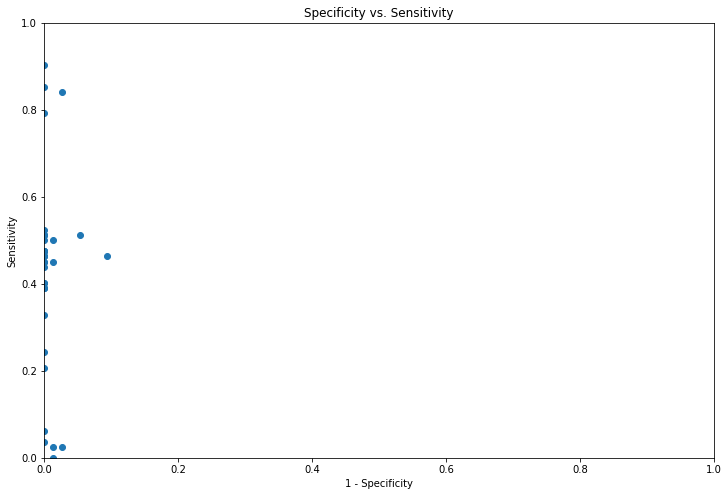

In [10]:
figures.specificity_vs_sensitivity(users_specificity, users_sensitivity)

### Compare Labeling Time to Users' Score

You can also check how User's mean Labeling Time outputs in their achieved scores.

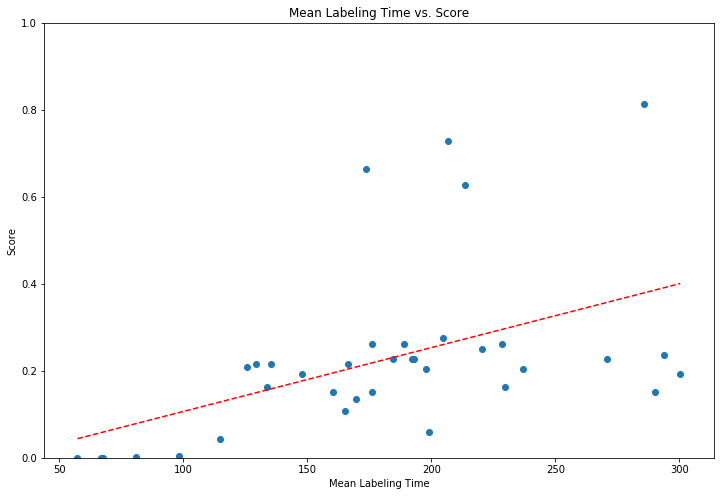

In [11]:
figures.mean_labeling_time_vs_score(rectangular_label_elements, users_scores)